## Exercício 20
### Análise de Consumo de Energia e Emissões de CO2 
### Análises e Visualizações:
### • Crie um Boxplot que compare o consumo de energias renováveis e fósseis por continente.
### • Use gráficos de linha para mostrar a evolução do consumo de energias renováveis e fósseis e as emissões de CO2 ao longo do tempo.
### • Visualize a contribuição dos setores (indústria, transporte, etc.) para as emissões de CO2 por continente.
### • Crie gráficos de dispersão para analisar a correlação entre o consumo de energia fóssil e as emissões de CO2 por continente, incluindo uma linha de regressão.
### • Crie gráficos interativos que permitam visualizar como o consumo energético impacta as emissões ao longo do tempo em diferentes regiões.
### Explique como o consumo de energia está relacionado às emissões de CO2, destacando diferenças regionais e setoriais.

In [14]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("dados_energia_simulados_ptbr.csv")
display(df)

,Ano,Continente,País,Setor,Consumo_Energia_Renovável (MWh),Consumo_Energia_Fóssil (MWh),Emissões_CO2 (toneladas),PIB (milhões de USD),População (milhões)
0,2016,Oceania,China,Comercial,7397.685031,12535.546950,78910.224574,2.463037e+06,165.908531
1,2020,América do Sul,Brasil,Transporte,971.598203,10036.494790,93896.756176,6.152132e+06,19.864661
2,2003,América do Sul,China,Indústria,5455.079849,6789.106081,22068.881619,2.228470e+06,184.533453
3,2019,América do Sul,China,Indústria,2778.436239,12941.548015,49534.631946,6.481451e+06,134.801730
4,2019,América do Sul,Rússia,Residencial,6429.091172,11755.142517,117101.029860,3.262370e+06,76.268548
...,...,...,...,...,...,...,...,...,...
1995,2015,Ásia,Rússia,Transporte,6174.180266,15064.717870,46007.220740,4.508684e+06,88.329964
1996,2004,América do Norte,Austrália,Residencial,5830.025049,11171.756011,94509.378347,3.220615e+06,183.781460
1997,2004,Ásia,China,Indústria,3582.590823,15129.916098,148449.630977,5.943108e+06,137.441825
1998,2009,Oceania,Estados Unidos,Residencial,2798.483361,10352.844393,50669.152564,5.887057e+06,50.080865


In [15]:
df.describe()

,Ano,Consumo_Energia_Renovável (MWh),Consumo_Energia_Fóssil (MWh),Emissões_CO2 (toneladas),PIB (milhões de USD),População (milhões)
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,2010.991000,5047.241453,9972.486177,99890.594067,4.991574e+06,99.571949
std,6.750534,1989.358867,5115.427170,50561.848340,1.979496e+06,50.500185
min,2000.000000,-1376.610759,-7908.823002,-67666.540624,-2.207004e+06,-61.365517
25%,2005.000000,3628.462963,6534.967027,64374.810818,3.603225e+06,65.267282
50%,2011.000000,5048.885126,9871.284228,100749.256341,5.066709e+06,98.684757
75%,2017.000000,6486.014516,13310.305836,135078.752569,6.328770e+06,133.097287
max,2022.000000,11590.030991,29338.727046,249096.437916,1.130907e+07,289.533188


In [16]:
df = df.sort_values(by="Ano")
energia_Renovavel_e_Fossil = df.groupby(["Continente","Ano"]).agg({"Consumo_Energia_Renovável (MWh)": ["sum"],
                                                  "Consumo_Energia_Fóssil (MWh)": ["sum"],
                                                    "Emissões_CO2 (toneladas)": "mean"}).reset_index()
energia_Renovavel_e_Fossil


,Continente,Ano,Consumo_Energia_Renovável (MWh),Consumo_Energia_Fóssil (MWh),Emissões_CO2 (toneladas)
,,,sum,sum,mean
0,América do Norte,2000,56956.608529,137819.639685,113433.567598
1,América do Norte,2001,108317.302959,229094.441592,99383.607983
2,América do Norte,2002,124945.691702,266825.635368,106401.831634
3,América do Norte,2003,52366.648443,83029.074755,101202.650526
4,América do Norte,2004,77393.698013,151822.998408,122097.291518
...,...,...,...,...,...
133,Ásia,2018,62450.438828,121426.801195,108504.319146
134,Ásia,2019,40361.204496,43331.518247,110886.396524
135,Ásia,2020,56312.887043,98753.364016,125144.942911


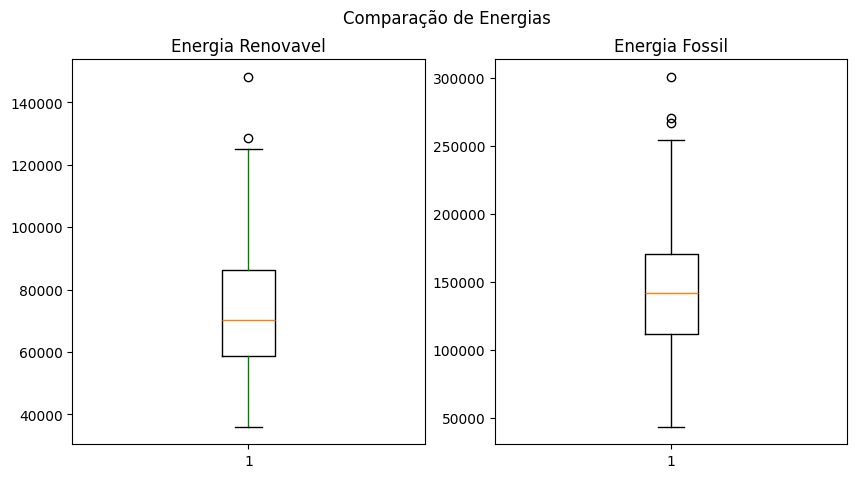

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
plt.suptitle("Comparação de Energias")
axs[0].boxplot(energia_Renovavel_e_Fossil["Consumo_Energia_Renovável (MWh)"],whiskerprops=dict(color="green"))
axs[0].set_title("Energia Renovavel")
axs[1].boxplot(energia_Renovavel_e_Fossil["Consumo_Energia_Fóssil (MWh)"])
axs[1].set_title("Energia Fossil")

plt.show()

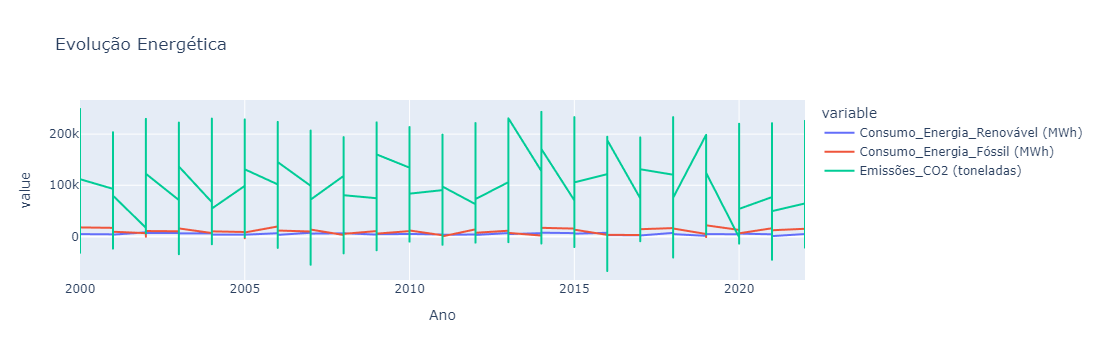

In [26]:
fig = px.line(df, x='Ano', y=["Consumo_Energia_Renovável (MWh)","Consumo_Energia_Fóssil (MWh)","Emissões_CO2 (toneladas)"], title='Evolução Energética')
fig.show()

In [19]:
fig = px.bar(df, x="Continente", y="Emissões_CO2 (toneladas)", color="Setor",
             barmode='group',
             title="Contribuição dos Setores para as Emissões de CO2 por Continente")
fig.show()

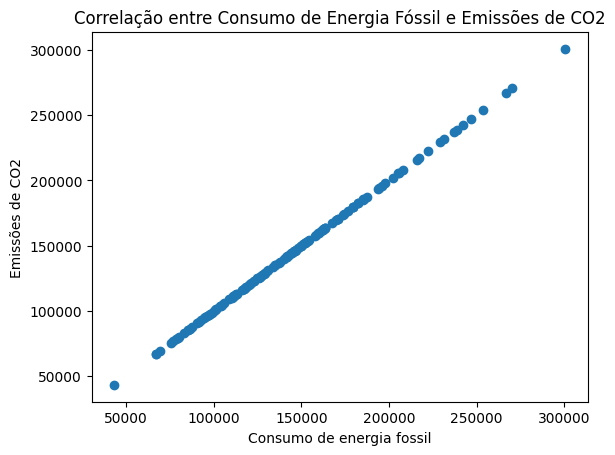

In [24]:
from scipy.stats import linregress
x = energia_Renovavel_e_Fossil["Consumo_Energia_Fóssil (MWh)"]
y = energia_Renovavel_e_Fossil["Consumo_Energia_Fóssil (MWh)"]
## slope, intercept, r_value, p_value, std_err, stderr_intercept = linregress(x, y)

plt.scatter(x,y)
plt.xlabel("Consumo de energia fossil")
plt.ylabel("Emissões de CO2")
plt.title("Correlação entre Consumo de Energia Fóssil e Emissões de CO2")
## plt.plot(x, intercept + slope*x, color='red')
plt.show()